In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import seaborn as sns

In [7]:
## set eager execution true
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [3]:
## Generate Training Data

train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape
n_samples

(17,)

In [4]:
## Define hyperparameters

lr = 0.01
epochs = 1000 ## number of times to go through the entire data
display_step = 100

In [15]:
## define W, b parameters of the model

W = tfe.Variable(np.random.randn(), name='weight')
b = tfe.Variable(np.random.randn(), name='bias')
W,b

(<tf.Variable 'weight:0' shape=() dtype=float32, numpy=1.4423302>,
 <tf.Variable 'bias:0' shape=() dtype=float32, numpy=-0.73254925>)

In [11]:
## define model 

def linear_regression(inputs):
    return W*inputs + b

def loss(model_fn, inputs , labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs)-labels,2))/(2*n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

# Compute gradients
grad = tfe.implicit_gradients(loss)



Initial Loss: 42.564632415771484
Epoch #50 loss=0.36509230732917786 W=0.4359051585197449 b=-0.5074447393417358
Epoch #100 loss=0.28369155526161194 W=0.39608532190322876 b=-0.22528693079948425
Epoch #150 loss=0.23365913331508636 W=0.36488282680511475 b=-0.004075242206454277
Epoch #200 loss=0.20290705561637878 W=0.34042033553123474 b=0.16935284435749054
Epoch #250 loss=0.18400554358959198 W=0.32124191522598267 b=0.30531901121139526
Epoch #300 loss=0.17238782346248627 W=0.30620622634887695 b=0.4119153618812561
Epoch #350 loss=0.1652470976114273 W=0.2944183349609375 b=0.49548593163490295
Epoch #400 loss=0.16085806488990784 W=0.28517675399780273 b=0.5610048770904541
Epoch #450 loss=0.15816040337085724 W=0.2779313921928406 b=0.6123709678649902
Epoch #500 loss=0.156502366065979 W=0.272251158952713 b=0.6526414752006531
Epoch #550 loss=0.1554831713438034 W=0.2677978575229645 b=0.6842133402824402
Epoch #600 loss=0.15485677123069763 W=0.26430651545524597 b=0.7089654207229614
Epoch #650 loss=0.154

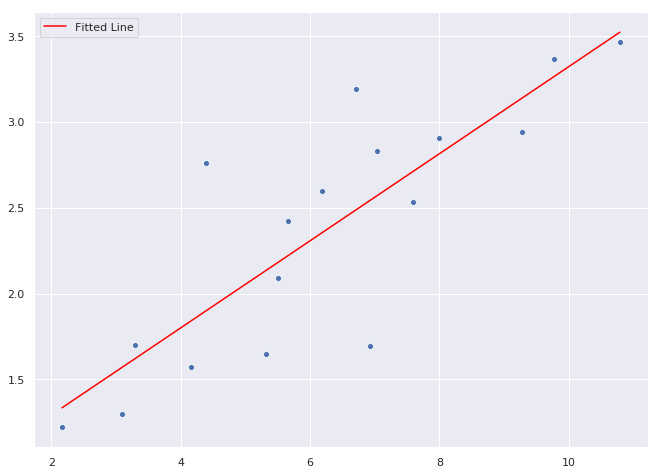

In [16]:
# Initial loss, before optimizing
print("Initial Loss: {}".format(loss(linear_regression, train_X, train_Y)[0]))

sns.set(rc={'figure.figsize':(11,8)})


## Train the model

for epoch in range(epochs):
    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))
    if(epoch+1)%display_step == 0:
        print("Epoch #{}".format(epoch+1), "loss={}".format(loss(linear_regression, train_X, train_Y)[0]), \
              "W={}".format(W.numpy()), "b={}".format(b.numpy()))
        
sns.scatterplot(train_X, train_Y)
sns.lineplot(train_X, train_X*(W.numpy()) + b.numpy(), color='red', label='Fitted Line')